In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/New folder/Cars93.csv")

In [2]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
CAT=[]
CON=[]
for i in A.columns:
    if (A[i].dtypes=='object'):
        CAT.append(i)
    else:
        CON.append(i)

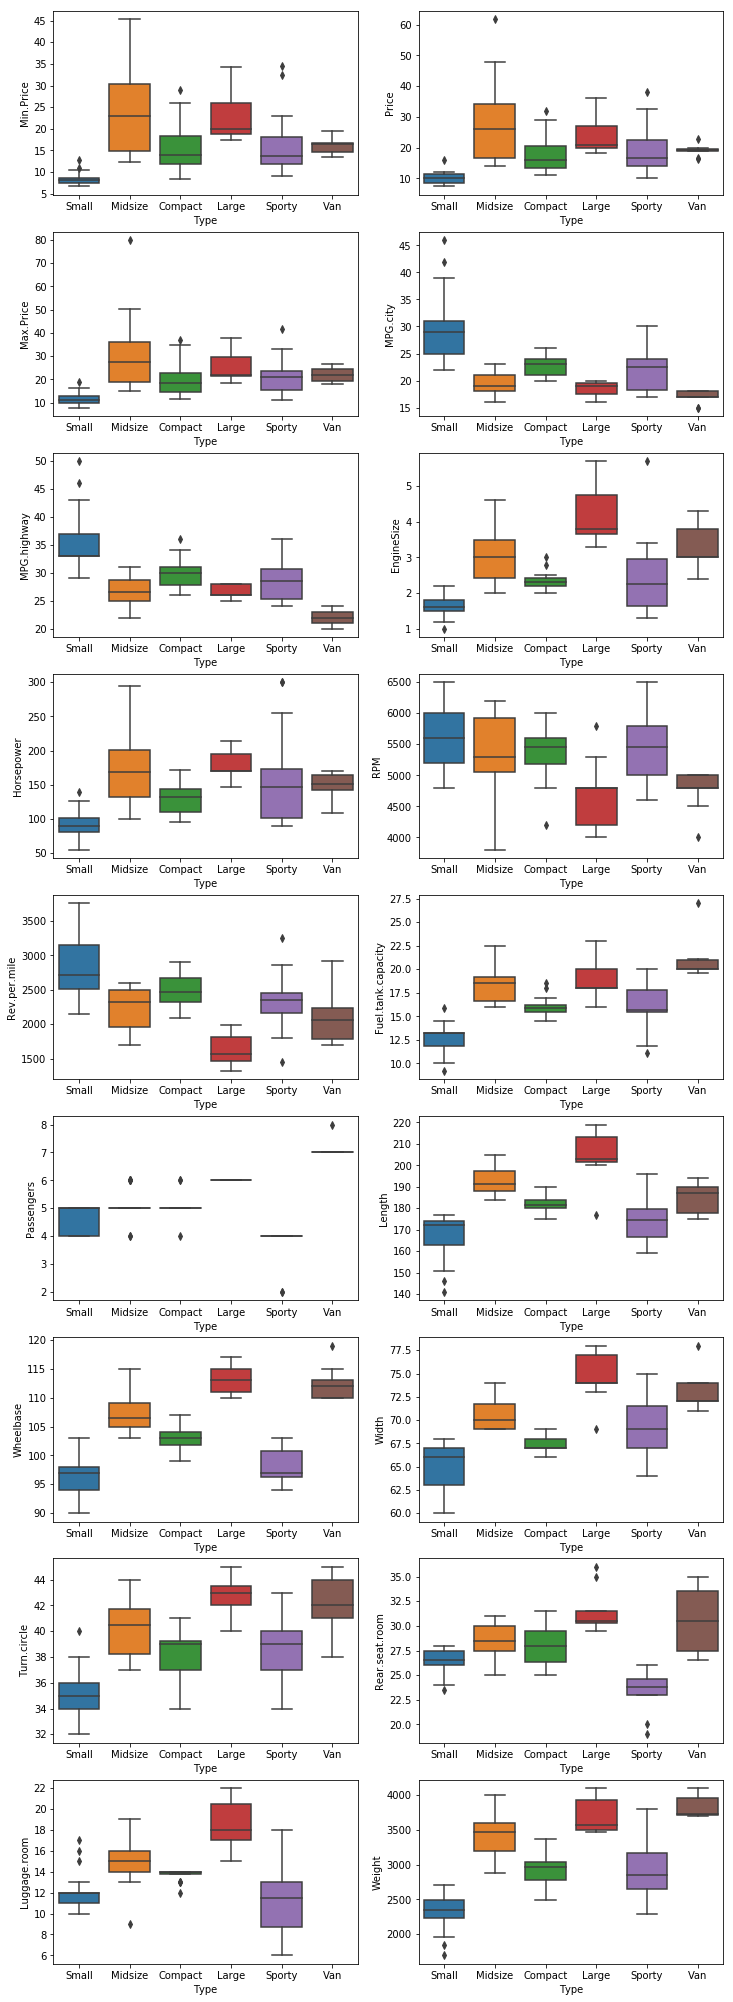

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(12,40))
for i in range(1,len(CON),1):
    plt.subplot(10,2,i)
    sb.boxplot(A.Type,A[CON[i]])
plt.show()    

In [9]:
pd.crosstab(A['Type'],A.AirBags)

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,4,7,0
Midsize,7,11,4
Small,0,5,16
Sporty,3,8,3
Van,0,3,6


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A=A.apply(le.fit_transform)

In [11]:
Y=A[['Type']]
X=A[A.columns[~A.columns.isin(['Type'])]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=24)

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),learning_rate=0.2)
model = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
MAE=accuracy_score(ytest,pred)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
MAE

0.7894736842105263

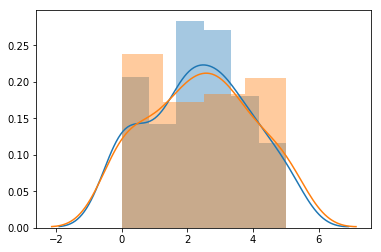

In [31]:
sb.distplot(Y)
sb.distplot(ytrain)

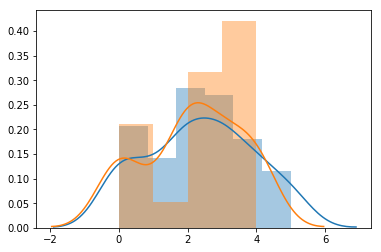

In [30]:
sb.distplot(Y)
sb.distplot(ytest)